In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
data_ID = pd.read_csv("C:/Users/sec/Desktop/DSL/data_ID.csv")
print(data_ID.head())
print(len(data_ID))
print(data_ID.columns)

   Unnamed: 0    ID  Counts   age  age_group  gender  car  reality  child_num  \
0           0  ID-0       5  38.0       30.0     0.0  0.0      0.0          0   
1           1  ID-1       9  31.0       30.0     0.0  0.0      1.0          1   
2           2  ID-2       6  52.0       50.0     1.0  1.0      1.0          0   
3           3  ID-3       2  41.0       40.0     0.0  0.0      1.0          0   
4           4  ID-4       1  41.0       40.0     0.0  1.0      1.0          0   

   income_total  ... work_phone phone email                occyp_type  \
0      202500.0  ...          0     0     0  Commercial_associate_etc   
1      247500.0  ...          0     0     1                  Laborers   
2      450000.0  ...          0     1     0                  Managers   
3      202500.0  ...          0     1     0               Sales staff   
4      157500.0  ...          0     0     0                  Managers   

   family_size  income_percentile  income_quantile  income_group5  credit_

# 저소득분위 내 자동차 보유 여부에 따른 연령 히스토그램

In [3]:
data_a = data_ID[data_ID['income_group5']<3]
data_b = data_a[data_a['car']==1]
len(data_a)
len(data_b)

1018

In [4]:
data_a.loc[data_a['car'] == 1, 'car'] = 'Y'
data_a.loc[data_a['car'] == 0, 'car'] = 'N'

C:\Users\sec\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


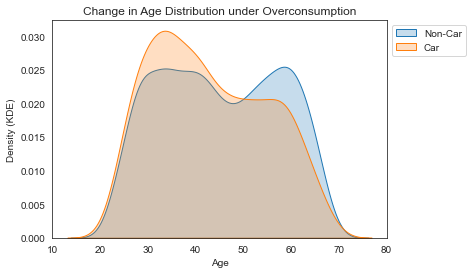

In [22]:
plt.title('Change in Age Distribution under Overconsumption')
sns.kdeplot(data_a['age'], shade = True, label = 'Non-Car')
sns.kdeplot(data_b['age'], shade = True, label = 'Car')
plt.xlabel('Age')
plt.ylabel('Density (KDE)')
plt.legend(labels = ['Non-Car', 'Car'],loc = 2, bbox_to_anchor = (1,1))
plt.show()

# 저소득분위 내 자동차 소유 여부에 따른 남녀 성비

## 데이터 재점검

In [7]:
data_a.loc[data_a['gender'] == 1, 'Gender'] = 'Male'
data_a.loc[data_a['gender'] == 0, 'Gender'] = 'Female'
print(data_a['Gender'])
df = data_a.groupby('car')['Gender'].value_counts(normalize = True)
print(df)

9       Female
11        Male
13      Female
26        Male
28        Male
         ...  
8749      Male
8750      Male
8751    Female
8752    Female
8758    Female
Name: Gender, Length: 3809, dtype: object
car  Gender
N    Female    0.838409
     Male      0.161591
Y    Female    0.543222
     Male      0.456778
Name: Gender, dtype: float64


C:\Users\sec\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\sec\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\sec\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

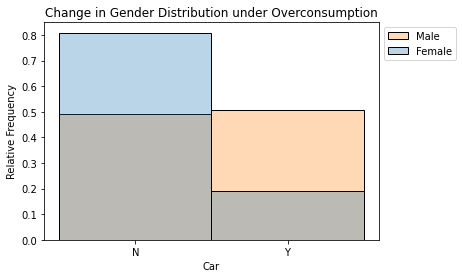

In [9]:
sns.histplot(x = 'car', data = data_a, hue = 'Gender', stat = 'probability', common_norm=False, fill = True, alpha = 0.3)
plt.title('Change in Gender Distribution under Overconsumption')
plt.xlabel('Car')
plt.ylabel('Relative Frequency')
plt.legend(labels = ['Male','Female'],loc = 2, bbox_to_anchor = (1,1))
plt.show()

## 소득 감소에 따른 자동차 보유 감소의 성별 간 차이

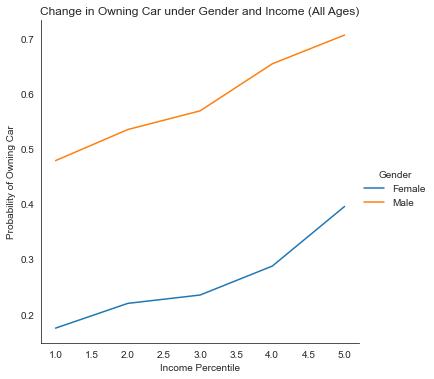

In [12]:
data_ID.loc[data_ID['gender'] == 1, 'Gender'] = 'Male'
data_ID.loc[data_ID['gender'] == 0, 'Gender'] = 'Female'
df = data_ID.groupby(['income_group5', 'Gender'])['car'].mean()
# print(df)

sns.relplot(data = df, x = 'income_group5', y = df.values, hue = 'Gender', kind = 'line')
plt.title('Change in Owning Car under Gender and Income (All Ages)')
plt.xlabel('Income Percentile')
plt.ylabel('Probability of Owning Car')

plt.show()

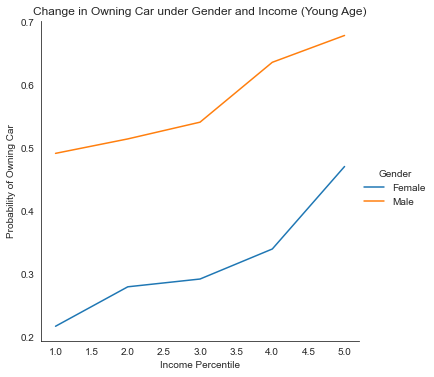

In [13]:
data_young = data_ID[data_ID['age_group']<=30]
df = data_young.groupby(['income_group5', 'Gender'])['car'].mean()
# print(df)

sns.relplot(data = df, x = 'income_group5', y = df.values, hue = 'Gender', kind = 'line')
plt.title('Change in Owning Car under Gender and Income (Young Age)')
plt.xlabel('Income Percentile')
plt.ylabel('Probability of Owning Car')
plt.show()

# 과소비 여부에 따른 소득형태 분포의 차이

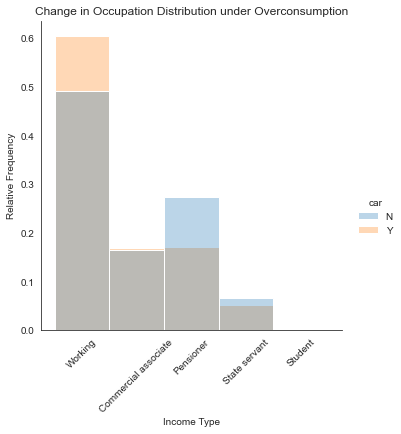

In [14]:
sns.displot(data_a, x = 'income_type', hue = 'car', stat='probability', common_norm=False, bins = 10, alpha = 0.3)
plt.title('Change in Occupation Distribution under Overconsumption')
plt.xlabel('Income Type')
plt.ylabel('Relative Frequency')
plt.xticks(rotation = 45)
plt.show()

# 과소비 여부에 따른 교육 수준 분포의 차이

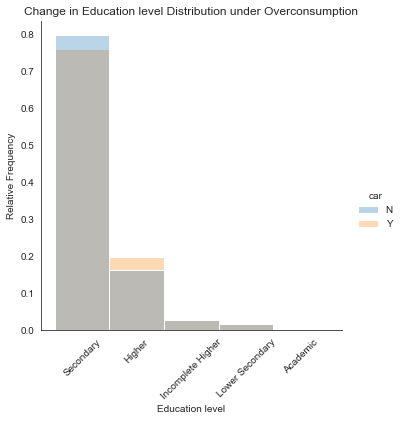

In [17]:
sns.displot(data_a, x = 'edu_type', hue = 'car', stat='probability', common_norm=False, bins = 10, alpha = 0.3)
plt.title('Change in Education level Distribution under Overconsumption')
plt.xlabel('Education level')
plt.ylabel('Relative Frequency')
plt.xticks(rotation = 45)
plt.xticks([0,1,2,3,4],['Secondary','Higher','Incomplete Higher','Lower Secondary','Academic'])
plt.show()